<a href="https://colab.research.google.com/github/erdemsirel/Data-Science-Resources/blob/master/DataScinceCaseThalia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Source
# https://www.kaggle.com/code/juniorbueno/analyzing-credit-default/data

In [57]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
def classification_results(y_true, y_pred_proba, name="", threshold=0.5):
    proba_to_label = lambda proba: 1 if proba>threshold else 0
    y_pred_proba = pd.Series(y_pred_proba)
    
    roc_auc = metrics.roc_auc_score(y_true, y_pred_proba)
    accuracy = metrics.accuracy_score(y_true, y_pred_proba.apply(proba_to_label))
    precission = metrics.precision_score(y_true, y_pred_proba.apply(proba_to_label))
    recall = metrics.recall_score(y_true, y_pred_proba.apply(proba_to_label))
    f1_score = metrics.f1_score(y_true, y_pred_proba.apply(proba_to_label))
    tn_norm, fp_norm, fn_norm, tp_norm = metrics.confusion_matrix(y_true, y_pred_proba.apply(proba_to_label), normalize='all').ravel()
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred_proba.apply(proba_to_label)).ravel()
    
    result = pd.DataFrame({
        'roc_auc': [roc_auc],
        'accuracy': [accuracy],
        'precission': [precission],
        'recall': [recall],
        'f1_score': [f1_score],
        'tn_norm': [tn_norm],
        'fp_norm': [fp_norm],
        'fn_norm': [fn_norm],
        'tp_norm': [tp_norm],
        'tn': [tn],
        'fp': [fp],
        'fn': [fn],
        'tp': [tp]},
        index=[name]).round(3)

    return result

In [35]:
def classification_results_test(y_pred_proba, threshold):
    test_label = pd.read_csv("https://raw.githubusercontent.com/erdemsirel/data_science_case/main/credit_risk_test_label.csv")['label']
    return classification_results(y_true=test_label, y_pred_proba=y_pred_proba, name="Test", threshold=threshold)

# Prepare Dummy Due Date and Paid Date

In [3]:
# data = pd.read_csv("https://raw.githubusercontent.com/erdemsirel/data_science_case/main/credit_risk_dataset.csv")

In [4]:
# To be deleted
# def add_duedate_and_pay_date(row):
#     np.random.seed(0)
#     row['due_date'] = pd.to_datetime('2021-06-01') + pd.to_timedelta(np.random.randint(0,365), unit='D')
#     if row['loan_status'] == 1:
#         row['paid_date'] = row['due_date'] + pd.to_timedelta(np.random.randint(31,31*3), unit='D')
#     else:
#         row['paid_date'] = row['due_date'] + pd.to_timedelta(np.random.randint(0,29), unit='D')
#     # Convert to string
#     row['due_date'] = row['due_date'].strftime('%Y-%m-%d')
#     row['paid_date'] = row['paid_date'].strftime('%Y%m%d')
#     return row
# data = data.apply(add_duedate_and_pay_date, axis=1)
# data.loc[(data['loan_status'] == 1) & (data.index < 100), 'paid_date'] = pd.NaT

# # Add label -1 cases
# indeterminate = data.sample(n=138).copy()
# indeterminate['loan_status'] = -1 
# indeterminate['due_date'] = indeterminate['due_date'].apply(lambda x: (pd.to_datetime('2022-10-07') - pd.to_timedelta(np.random.randint(0,28), unit='D')).strftime('%Y-%m-%d'))
# indeterminate['paid_date'] = None
# print(data.shape)
# data = pd.concat([data, indeterminate], axis='index').sample(frac=1).reset_index(drop=True)
# print(data.shape)

(32581, 14)
(32719, 14)


In [6]:
# data_to_be_saved = data.copy()
# data_to_be_saved_dev, data_to_be_saved_test = train_test_split(data_to_be_saved, test_size=0.25, random_state=32)

In [13]:
# data_to_be_saved_dev.reset_index(drop=True).drop(columns=["loan_status"]).to_csv("credit_risk_development_dataset.csv", index=True)

In [14]:
# data_to_be_saved_test = data_to_be_saved_test.reset_index(drop=True).rename(columns={'loan_status':'label'})


# data_to_be_saved_test.drop(columns=['label', 'paid_date']).to_csv("credit_risk_test_dataset.csv", index=True)
# data_to_be_saved_test[['label']].to_csv("credit_risk_test_label.csv", index=True)

# Load the Data

In [22]:
data = pd.read_csv("https://raw.githubusercontent.com/erdemsirel/data_science_case/main/credit_risk_development_dataset.csv").drop(columns=['Unnamed: 0'])

In [23]:
data.head(1)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,due_date,paid_date
0,23,69000,MORTGAGE,7.0,MEDICAL,C,8325,13.49,0.12,N,4,2021-11-20,20211205.0


In [24]:
data_test = pd.read_csv("https://raw.githubusercontent.com/erdemsirel/data_science_case/main/credit_risk_test_dataset.csv").drop(columns=['Unnamed: 0'])

In [25]:
data_test.head(1)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,due_date
0,26,68926,RENT,4.0,PERSONAL,D,8400,17.27,0.12,N,2,2021-11-20


# Exploratory Data Analysis

In [28]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,paid_date
count,24539.000000,2.453900e+04,23859.000000,24539.000000,22149.000000,24539.000000,24539.000000,2.437900e+04
mean,27.727984,6.581148e+04,4.790435,9584.107951,11.001155,0.170394,5.797017,2.021316e+07
std,6.392886,6.304690e+04,4.102428,6327.218592,3.240074,0.106970,4.047058,3.708728e+03
min,20.000000,4.080000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,2.021120e+07
25%,23.000000,3.870000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,2.021120e+07
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,2.021120e+07
75%,30.000000,7.900000e+04,7.000000,12237.500000,13.470000,0.230000,8.000000,2.021120e+07
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.780000,30.000000,2.022021e+07


In [26]:
data.isnull().mean().rename("# of Missing Values")

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             0.027711
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 0.097396
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
due_date                      0.000000
paid_date                     0.006520
Name: # of Missing Values, dtype: float64

In [48]:
data_test.isnull().mean().rename("# of Missing Values")

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             0.026773
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 0.090098
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
Name: # of Missing Values, dtype: float64

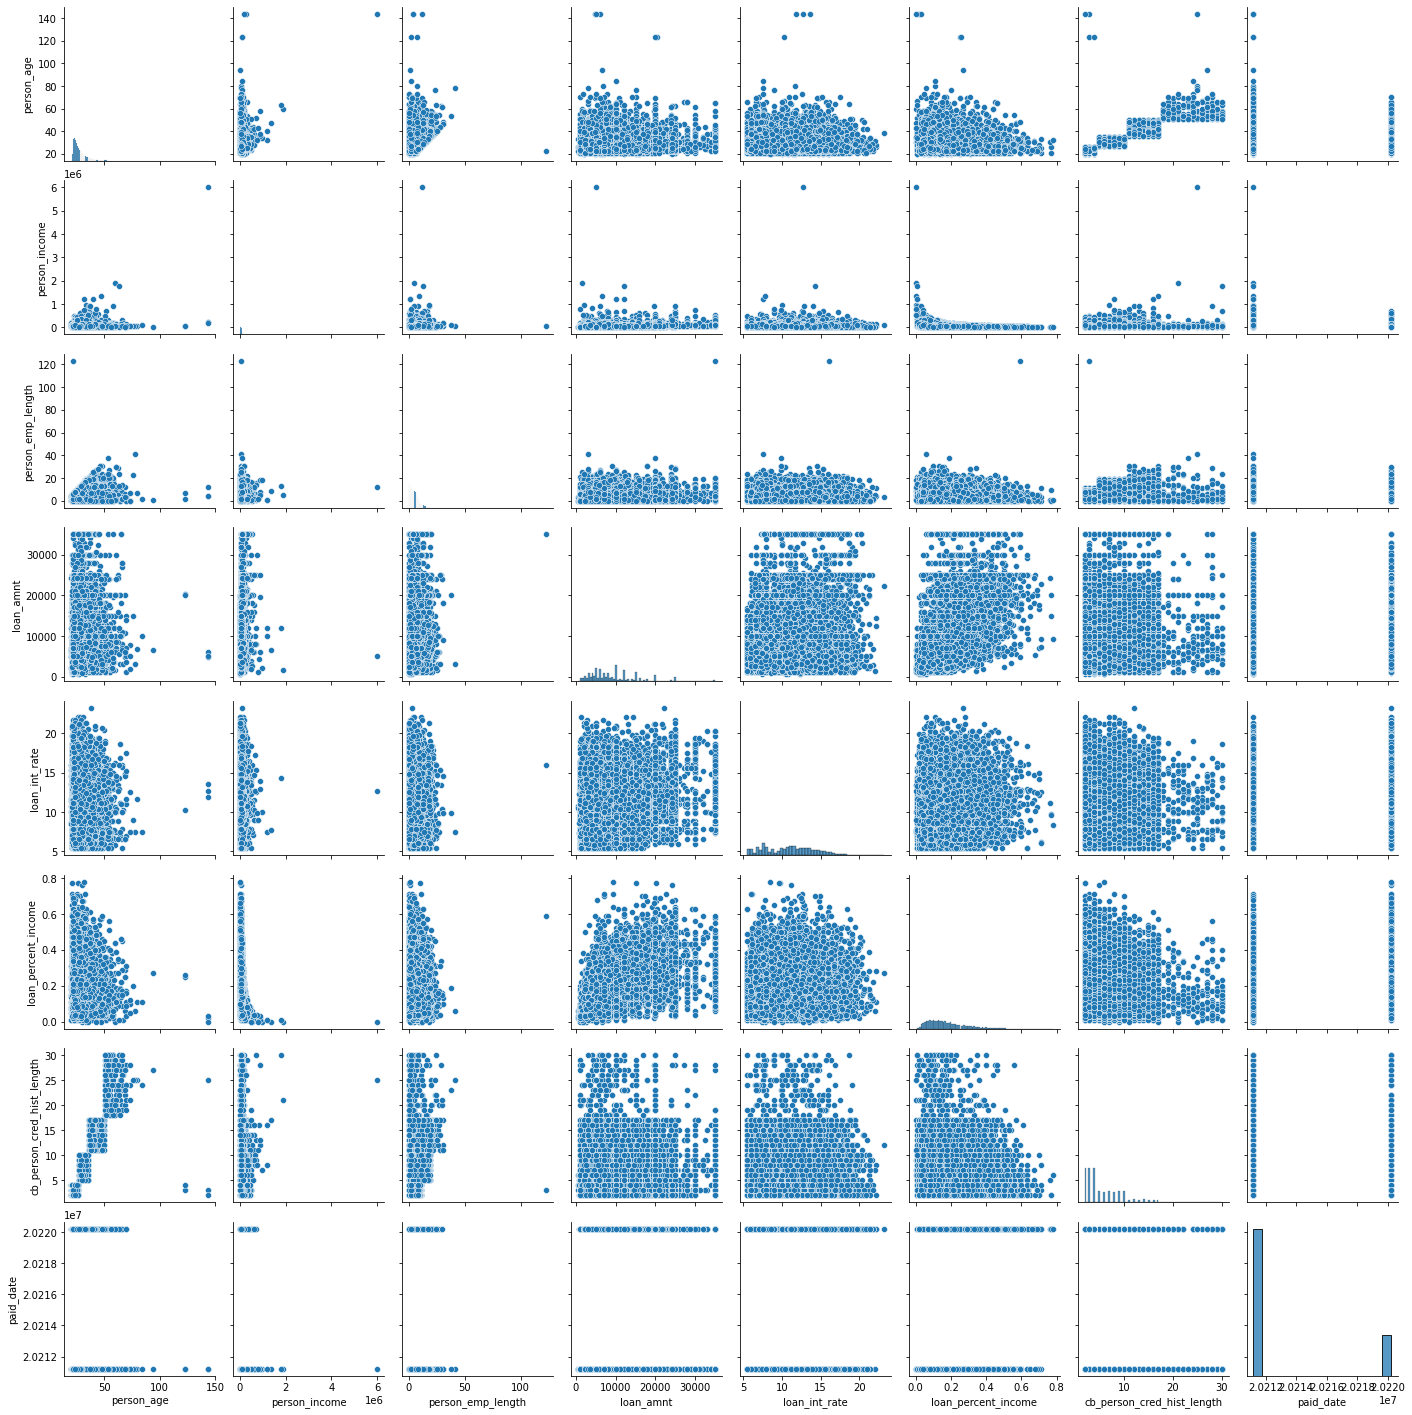

In [29]:
sns.pairplot(data)
plt.show()

# Data Processing

## Building the label

In [36]:
data['due_date'] = pd.to_datetime(data['due_date'], format='%Y-%m-%d')
data['paid_date'] = pd.to_datetime(data['paid_date'], format='%Y%m%d')

In [37]:
mask_paid = (~data['paid_date'].isna())
mask_paid_date_30_days_past_due_date = (data['paid_date'] - data['due_date']).dt.days > 30
mask_current_date_30_days_past_due_date = (pd.to_datetime('2022-10-07') - data['due_date']).dt.days > 30

data.loc[mask_paid & mask_paid_date_30_days_past_due_date, "label"] = 1
data.loc[mask_paid & (~mask_paid_date_30_days_past_due_date), "label"] = 0
data.loc[(~mask_paid) & (mask_current_date_30_days_past_due_date), "label"] = 1
data.loc[(~mask_paid) & (~mask_current_date_30_days_past_due_date), "label"] = -1
data = data[data["label"] >= 0]


In [38]:
data_with_label_orj = data.copy()

Postive Class Ratio 0.218


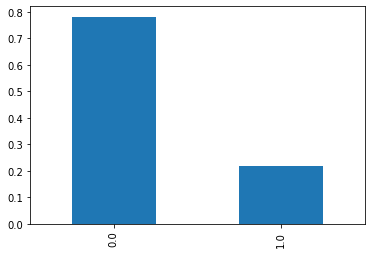

In [39]:
class_ratio = data.label.value_counts(normalize=True)
class_ratio.plot(kind='bar')
print("Postive Class Ratio", class_ratio[1].round(3))

# Building the Baseline Model

In [44]:
data = data_with_label_orj.copy()

In [45]:
data = data.drop(columns=['due_date', 'paid_date'])
data_test = data_test.drop(columns=['due_date'])

data.head(1)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,label
0,23,69000,MORTGAGE,7.0,MEDICAL,C,8325,13.49,0.12,N,4,0.0


In [46]:
data = pd.get_dummies(data, columns=["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"])
data.head(1)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,label,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,23,69000,7.0,8325,13.49,0.12,4,0.0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [49]:
print("Number of rows before NA removal:", data.shape[0])
data = data.dropna()
print("Number of rows after NA removal:", data.shape[0])

Number of rows before NA removal: 21420
Number of rows after NA removal: 21420


In [50]:
x = data.drop(columns='label')

y = data['label']

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.33, random_state=32)

In [51]:
x_train.head(1)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
2896,27,57996,1.0,4800,8.59,0.08,9,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [58]:
model = LogisticRegression()

In [59]:
model.fit(x_train, y_train)

LogisticRegression()

In [60]:
classification_results(y_val, model.predict_proba(x_val)[:,1], name="validation")

,roc_auc,accuracy,precission,recall,f1_score,tn_norm,fp_norm,fn_norm,tp_norm,tn,fp,fn,tp
validation,0.75,0.801,0.727,0.167,0.271,0.764,0.014,0.185,0.037,5404,98,1306,261


# Improving the Baseline Model

In [ ]:
model = RandomForestClassifier()

numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model)])

## Outlier Handling

In [ ]:
# Drop person_age above 85
# Drop person_income above 140000
# Drop person_emp_length above 20

In [ ]:
x_train = x_train[(x_train['person_age'] <= 85) 
                   & (x_train['person_income'] <= 140000)
                   & (x_train['person_emp_length'] <= 20)
                  ]
y_train = y_train.loc[x_train.index]

In [ ]:
stats = x_train.describe().T
stats['IQR'] = stats['75%'] - stats['25%']
stats['lower_threshold'] = stats['25%'] - stats['IQR'] * 1.5
stats['upper_threshold'] = stats['75%'] + stats['IQR'] * 1.5
stats.loc[feat_imp.index, :][stats['max']>1]

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(9*3, 4*3))
fig.subplots_adjust(hspace=0.5)
axes = (ax for ax in axes.flat)
for col in data.columns:
    if data[col].nunique()==2: continue
    ax_ = sns.boxplot(data=data, x=col, ax=next(axes))
    ax_.set_title(col)
plt.show()

## Correlated Feature Removal

In [ ]:
col_order = data.columns.tolist()
col_order.remove('label')
col_order.append('label')

correlations = data[col_order].corr().abs().round(2)
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlations, annot=True,linewidths=.5, center=1)

## Handling Missing Data

## Feature Engineering

## Hyper-parameter Optimisation